In [48]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [39]:
df = pd.read_csv("train.csv")

# Descriptive analysis

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
for column in df1.columns:
    try:
        print(f"===============Column: {column}==============")
        print(f"Number of unique values: {df1[column].nunique()}")
        print(f"Max: {df1[column].max()}")
        print(f"Min: {df1[column].min()}")
    except TypeError:
        pass

===============Column: PassengerId==============
Number of unique values: 891
Max: 891
Min: 1
===============Column: Survived==============
Number of unique values: 2
Max: 1
Min: 0
===============Column: Pclass==============
Number of unique values: 3
Max: 3
Min: 1
===============Column: Name==============
Number of unique values: 891
Max: van Melkebeke, Mr. Philemon
Min: Abbing, Mr. Anthony
===============Column: Sex==============
Number of unique values: 2
Max: male
Min: female
===============Column: Age==============
Number of unique values: 88
Max: 80.0
Min: 0.42
===============Column: SibSp==============
Number of unique values: 7
Max: 8
Min: 0
===============Column: Parch==============
Number of unique values: 7
Max: 6
Min: 0
===============Column: Ticket==============
Number of unique values: 681
Max: WE/P 5735
Min: 110152
===============Column: Fare==============
Number of unique values: 248
Max: 512.3292
Min: 0.0
===============Column: Cabin==============
Number of unique valu

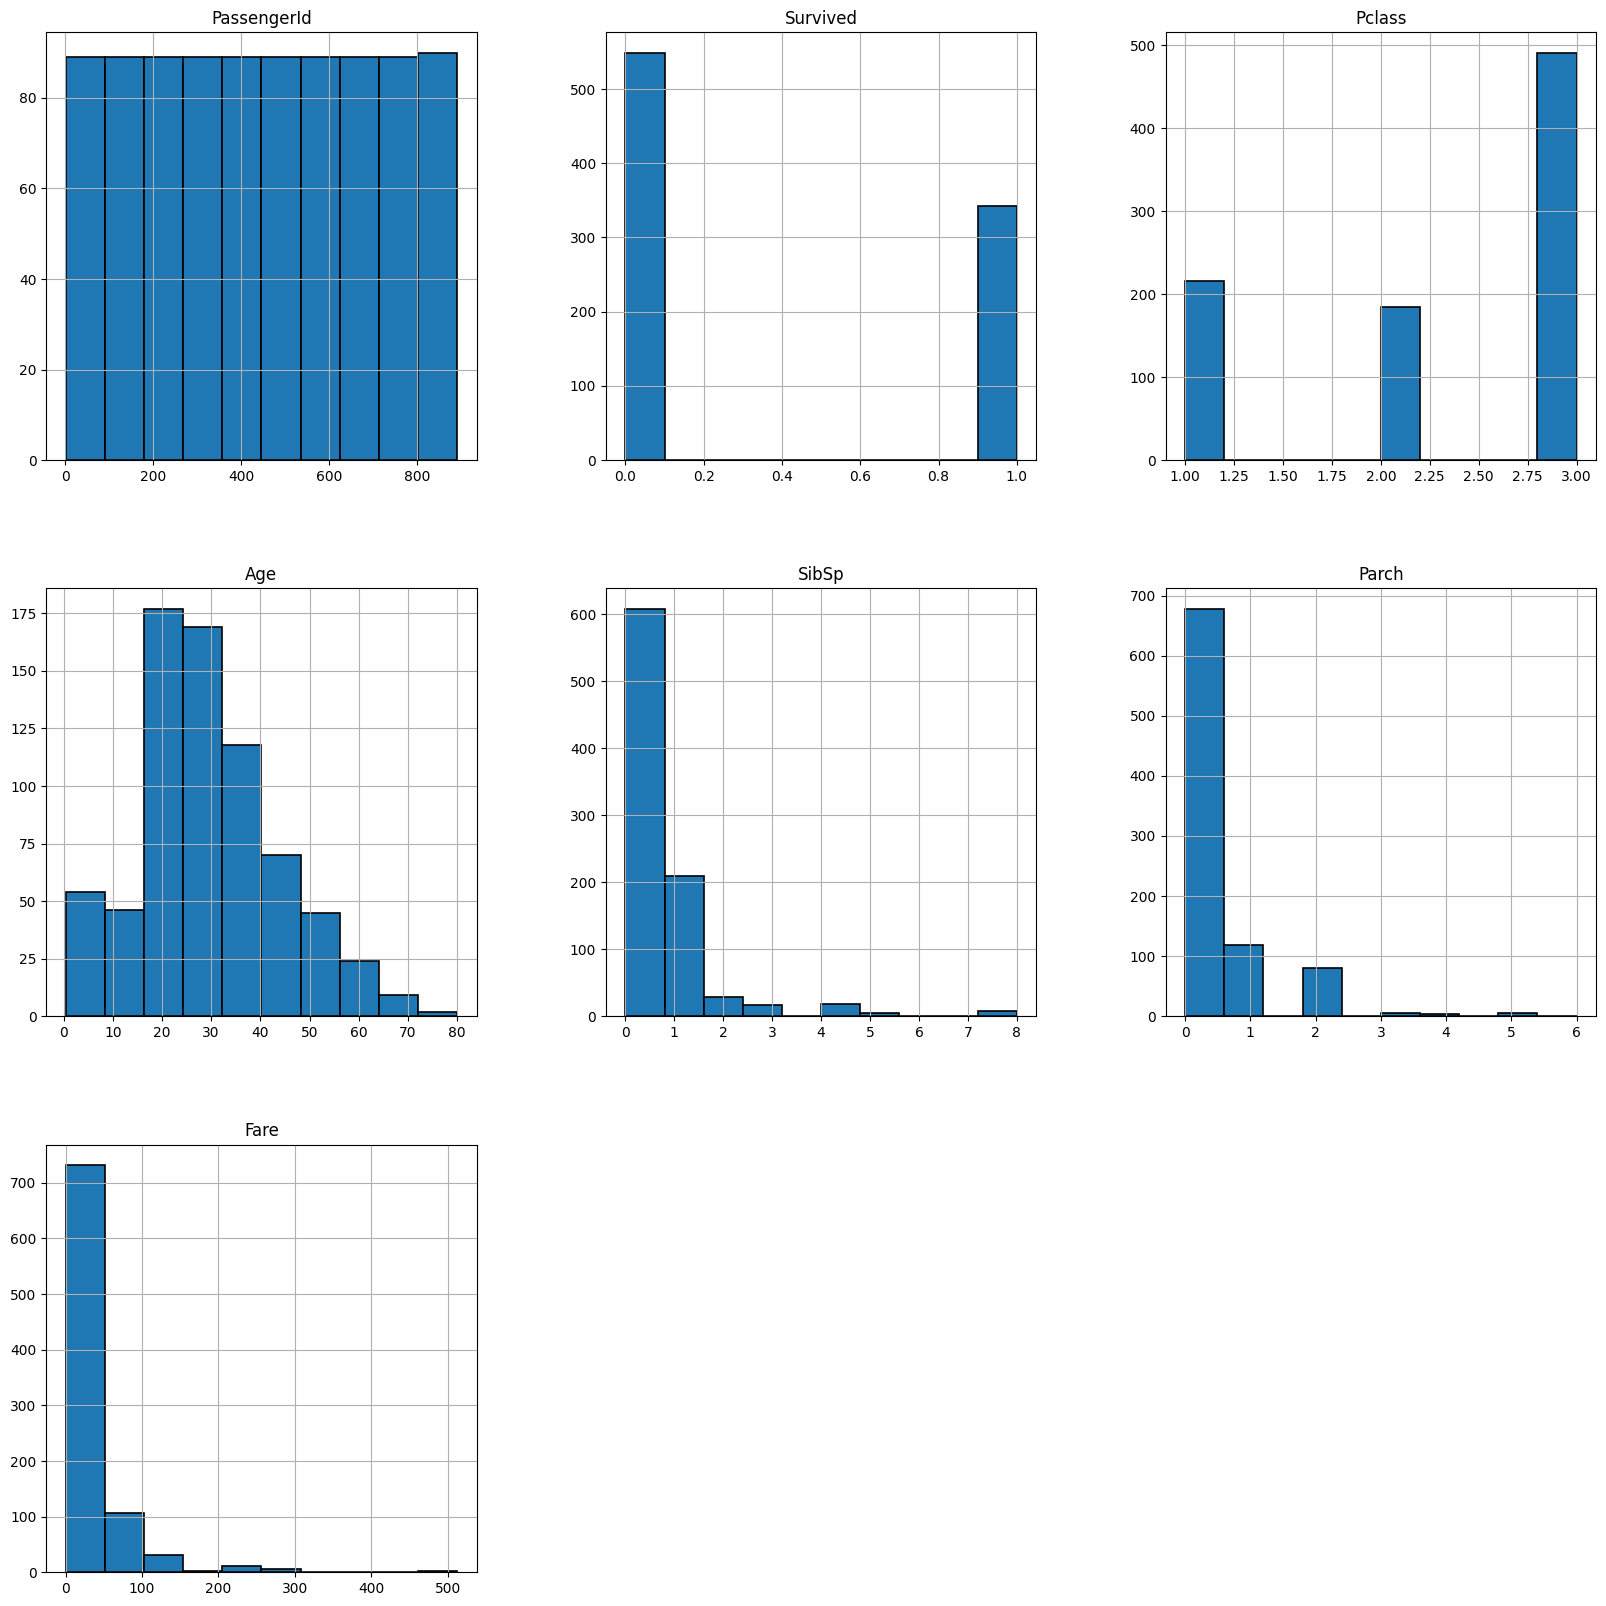

In [10]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<Axes: >

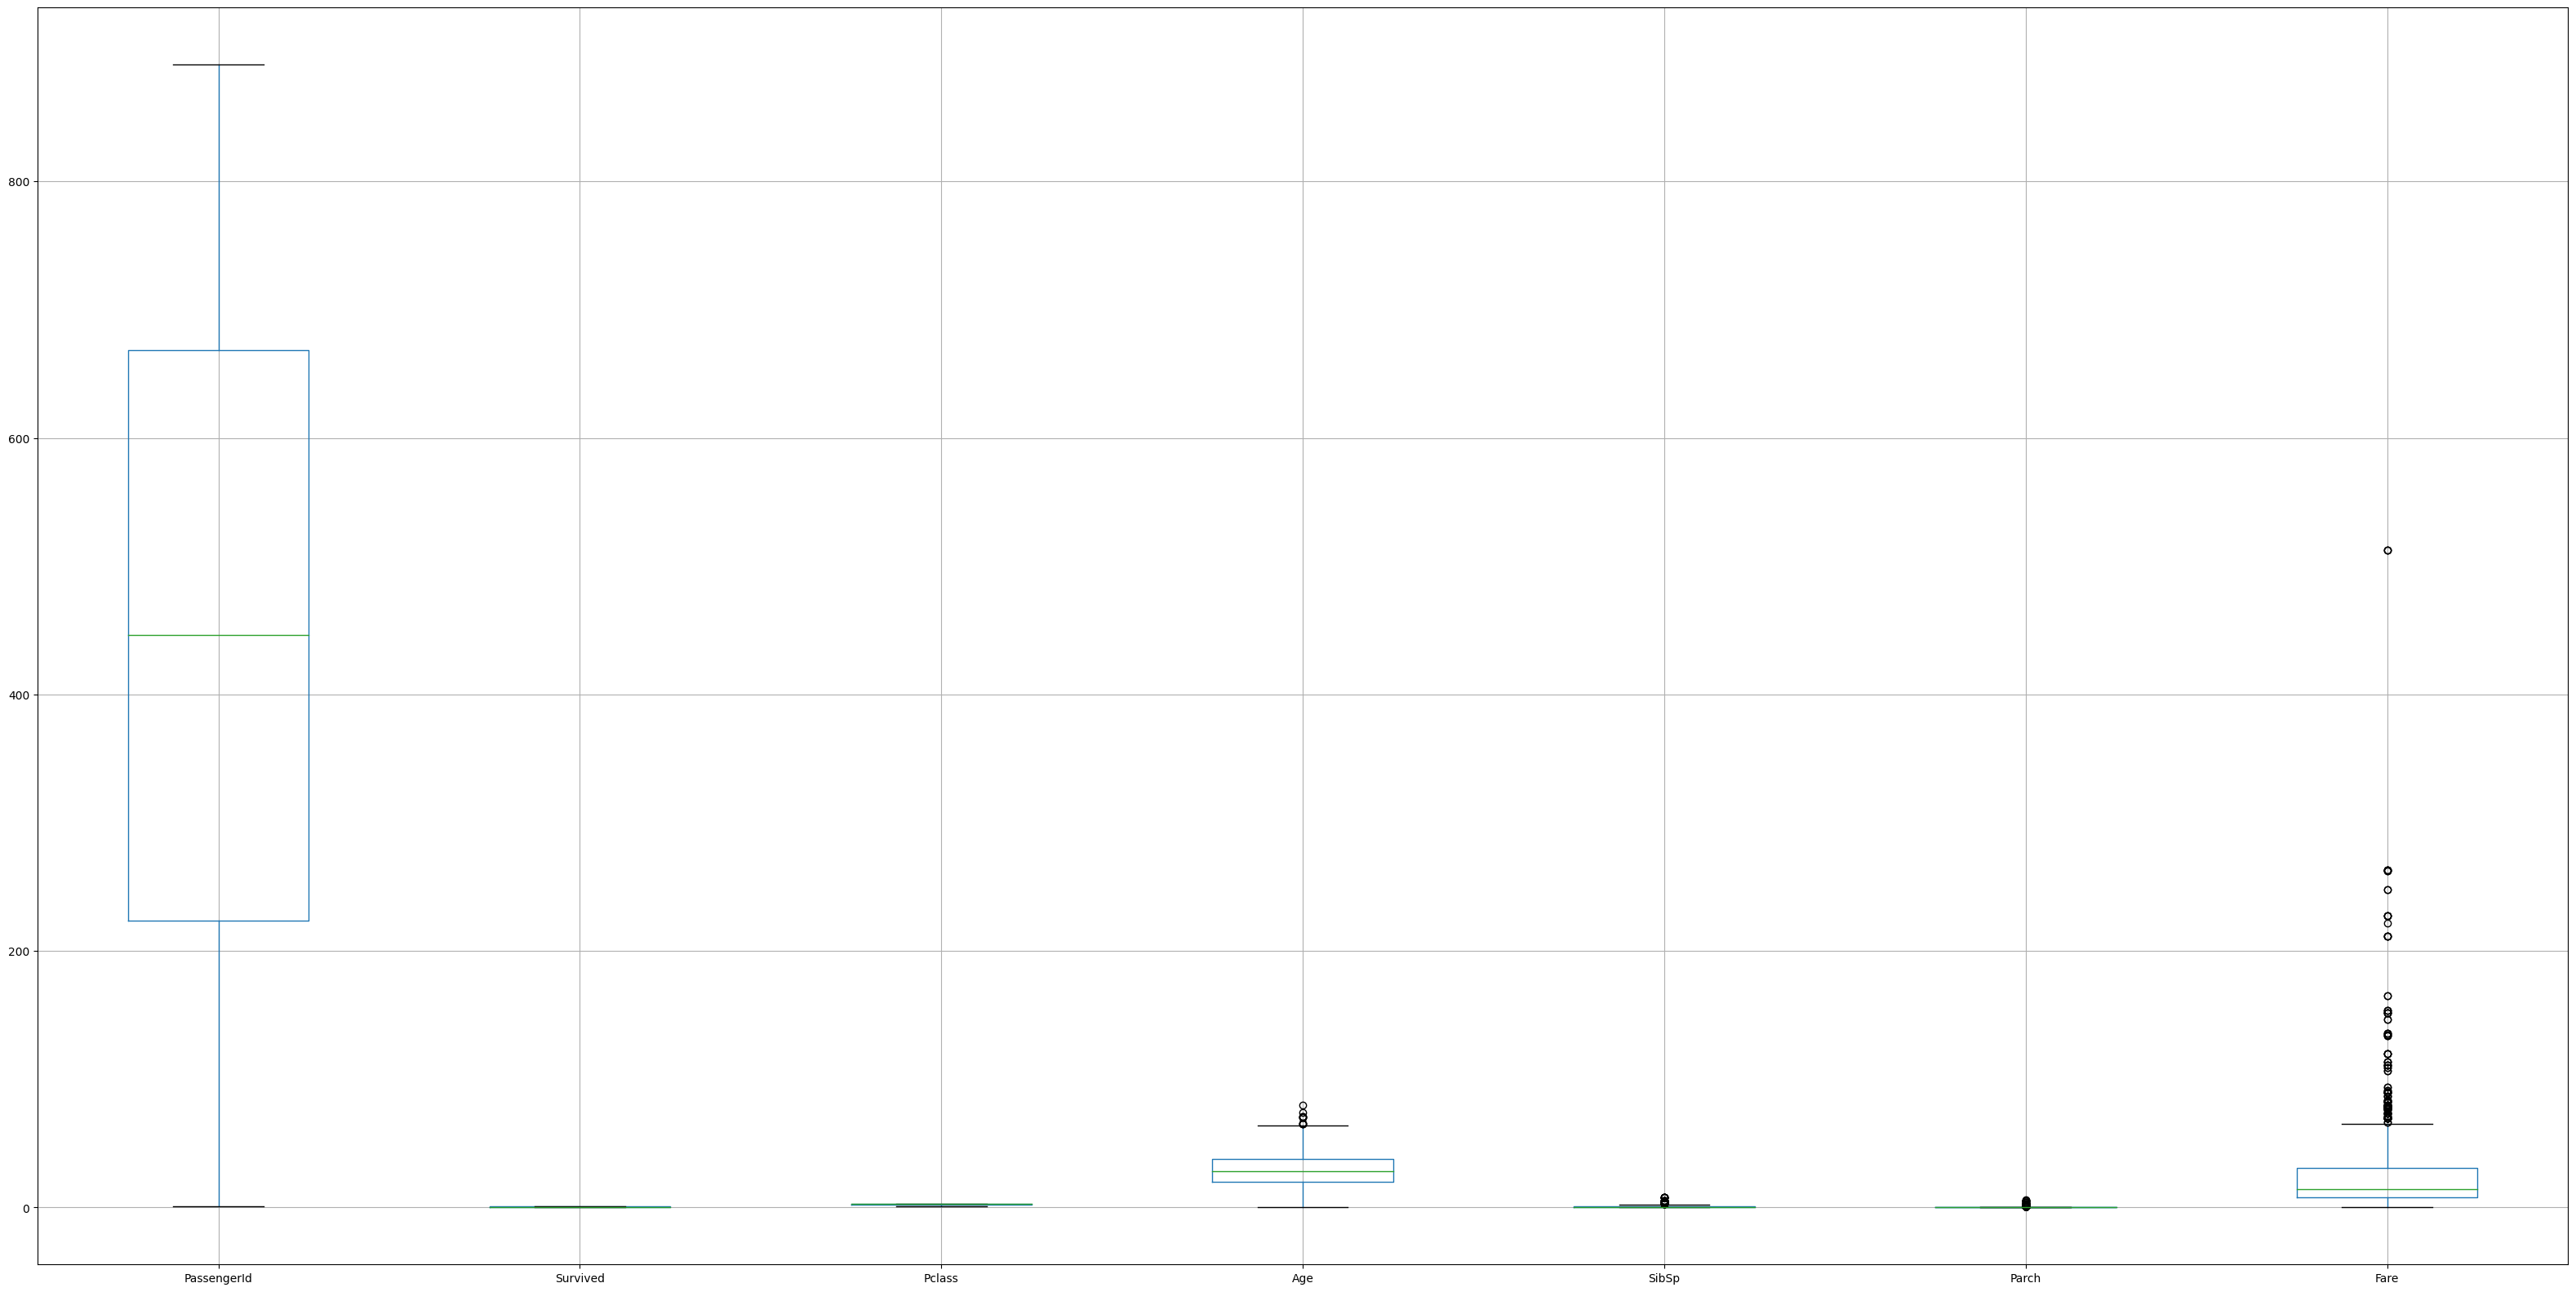

In [13]:
df.boxplot(figsize=(40, 20))

# PREPROCESSING

In [63]:
preprocessed = df
preprocessed['Sex'] = preprocessing.LabelEncoder().fit_transform(df['Sex'])
preprocessed['Embarked'] = preprocessing.LabelEncoder().fit_transform(df['Embarked'])
preprocessed["Cabin"] = preprocessed["Cabin"].fillna(0)
preprocessed["Cabin"] = preprocessed["Cabin"].map(lambda x: 1 if x != 0 else 0)
preprocessed = preprocessed.drop("Name", axis=1)
preprocessed = preprocessed.drop("Ticket", axis=1)
preprocessed.head()                                                                     
                                                                      

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0,2
1,2,1,1,0,38.0,1,0,71.2833,1,0
2,3,1,3,0,26.0,0,0,7.9250,0,2
3,4,1,1,0,35.0,1,0,53.1000,1,2
4,5,0,3,1,35.0,0,0,8.0500,0,2


C:\Users\x401621\AppData\Local\Temp\ipykernel_2180\3810857354.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), annot=True)


<Axes: >

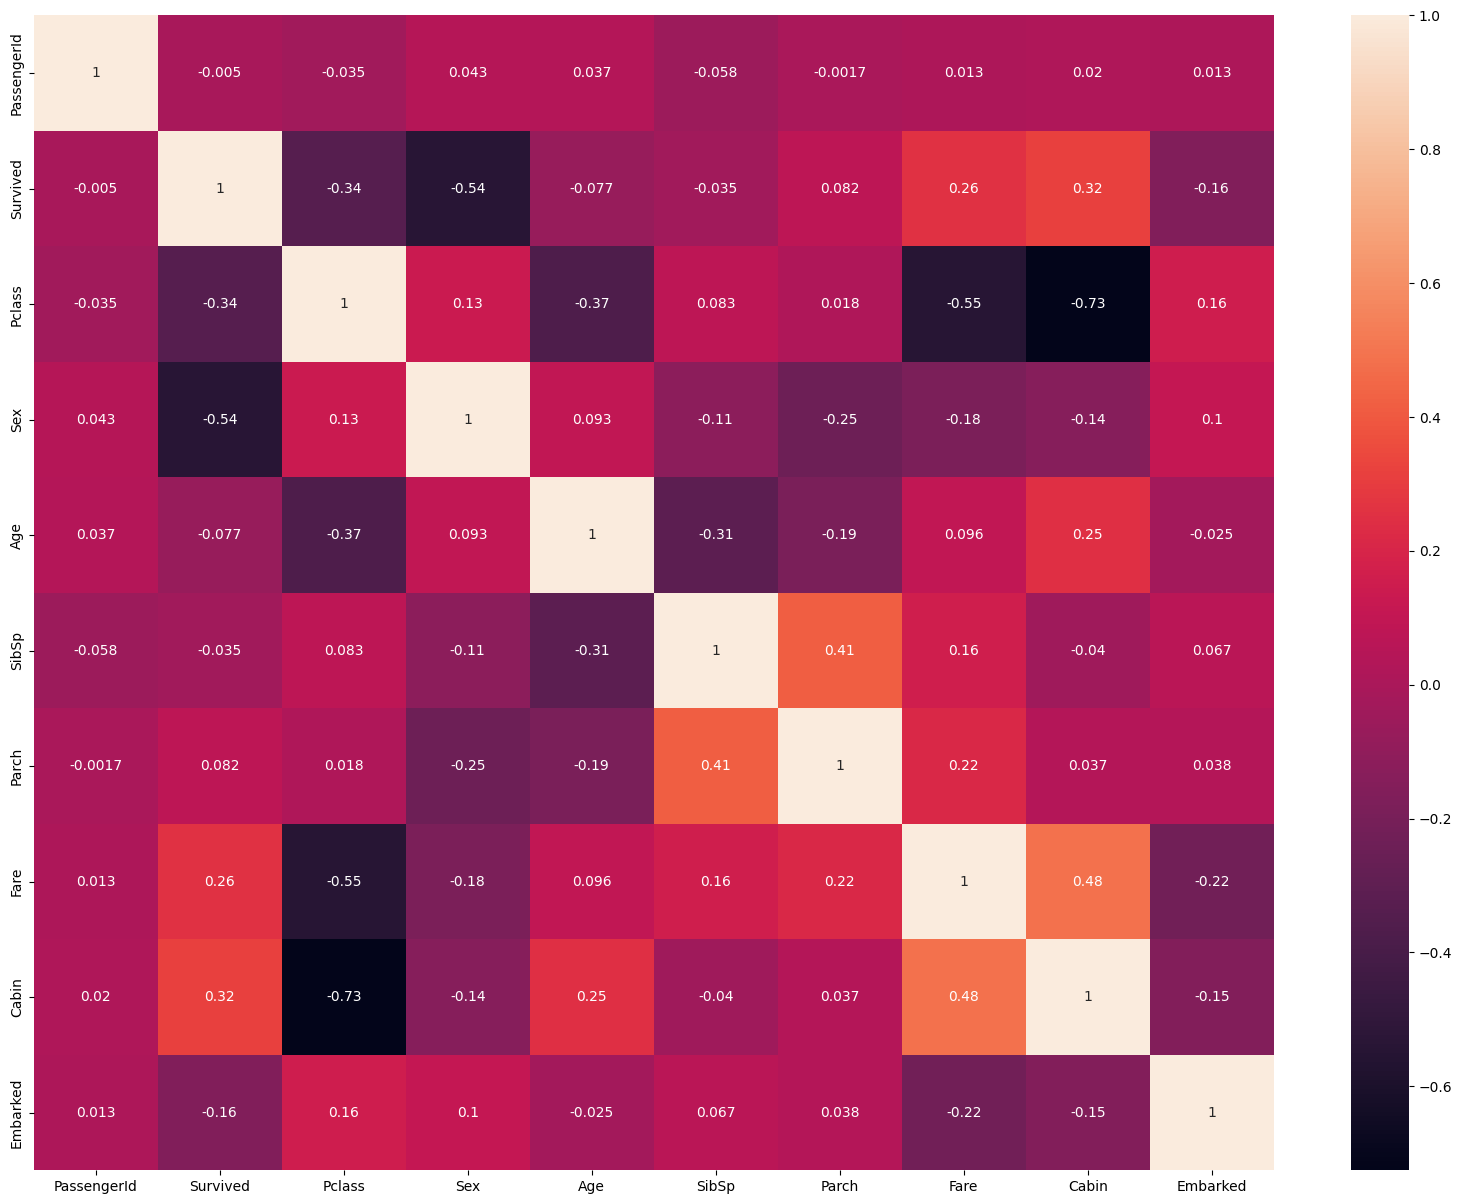

In [64]:
plt.figure(figsize=(20, 15))
sn.heatmap(df.corr(), annot=True)
